___
# PROJETO 1

## <font color='red'>Jose Fernando de Melo Cruz</font>
___

## <font color='blue'>Aposentados: Peças importantes no passado, mas ainda querem 'se ligar' no futuro!</font>

## Introdução

Sou bastante ligado em tecnologia e acho que história e geografia política são boas areas para se investir pensando em trabalhos passados com as PNADs, então seguirei essa linha de pensamento para meu projeto. Pretendo analisar a presença de uma ação migratória que ocorreu à alguns anos, além de mostrar a distribuição de renda e de pessoas pelo país.
<img src="mapa.png"/, width=600, height=500 style="float: center; margin: 0px 0px 10px 10px"> 
O mapa é uma pesquisa que deverá pacer bastante os dados encontrados na PINAD.
Muitos sites indicam o nivel de interesse  das pessoas por novas tecnologias, os mais velhos, sem ser deixados de fora estão atras dela também. A USP esta dando um curso de como se mecher em smartphones para esses idosos.

___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Jose Fernando\Documents\2° Semestre\Ciência dos Dados\Nova pasta\CDEng\Projeto1


In [4]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
DADOS2014 = pd.read_csv("pes2014.csv", sep=",")

In [5]:
DADOS2014.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [6]:
n = DADOS2014.shape[0]

In [106]:
d = pd.DataFrame()#dataframe para sexo de todos
d["aposentados2014"]= DADOS2014.V9122.astype("category")
d["sexo"] = DADOS2014.V0302.astype("category")
d.sexo.cat.categories = ('masculino', 'feminino')

In [152]:
dd = pd.DataFrame()#data principal
dd = DADOS2014[(DADOS2014.V9122==2)]
dd["sexoap"] = DADOS2014.V0302.astype("category")
dd.sexoap.cat.categories = ('masculino', 'feminino')
dd["Regiao"] = DADOS2014.UF
dd.Regiao[(DADOS2014.UF >= 10) & (DADOS2014.UF < 20)] = 1
dd.Regiao[(DADOS2014.UF >= 20) & (DADOS2014.UF < 30)] = 2
dd.Regiao[(DADOS2014.UF >= 30) & (DADOS2014.UF < 40)] = 3
dd.Regiao[(DADOS2014.UF >= 40) & (DADOS2014.UF < 50)] = 4
dd.Regiao[(DADOS2014.UF >= 50) & (DADOS2014.UF < 60)] = 5
dd.Regiao = dd.Regiao.astype('category')
dd.Regiao.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')
dd["beneficioAP"] = DADOS2014.V1252[(DADOS2014.V1252!=999999999999)]
dd["celular"] = DADOS2014.V06112.astype("category")
dd.celular.cat.categories = ('possui','não possui')
dd["migração"] = DADOS2014.V0502.astype("category")
dd.migração.cat.categories = ("sim","não")
dd["extra"] = DADOS2014.V7122[(DADOS2014.V7122!=999999999999)]

C:\Users\Jose Fernando\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Jose Fernando\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jose Fernando\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

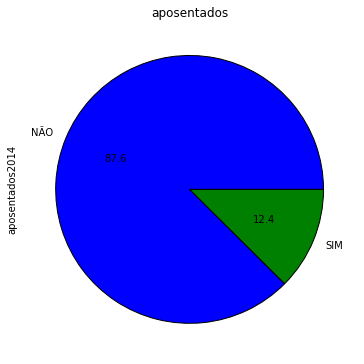

In [78]:
d.aposentados2014.cat.categories = ('SIM','NÃO')
ut1 = (d.aposentados2014.value_counts(0)/n*100).round(decimals=1)
plot = ut1.plot(kind='pie',title='aposentados',autopct='%.1f',figsize=(6, 6))

sexo             masculino  feminino
aposentados2014                     
2.0                  19015     19628
4.0                 130866    142252


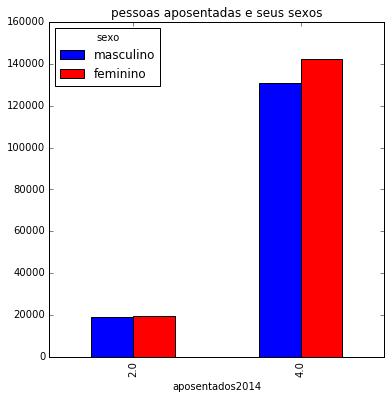

In [151]:
ct4 = pd.crosstab(d.aposentados2014, d.sexo)
print(ct4)
plot = ct4.plot(kind='bar',title='pessoas aposentadas e seus sexos',figsize=(6, 6),color=('b','r','k','w','y'))

feminino     19628
masculino    19015
Name: sexoap, dtype: int64


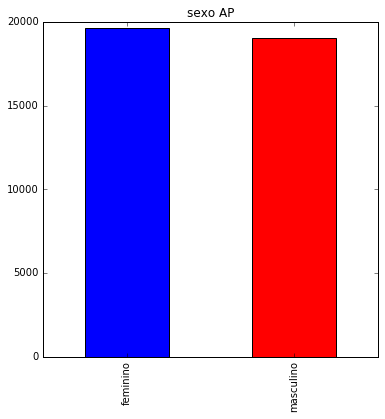

In [150]:
ut3 = (dd.sexoap.value_counts())
print(ut3)
plot = ut3.plot(kind='bar',title='sexo AP',figsize=(6, 6),color=('b','r','k','w','y'))

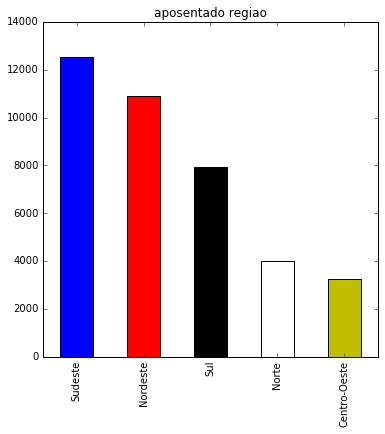

In [147]:
ut7 = (dd.Regiao.value_counts())
plot = ut7.plot(kind='bar',title='aposentado região',figsize=(6, 6),color=('b','r','k','w','y'))

In [109]:
dd.beneficioAP.describe()

C:\Users\Jose Fernando\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    38020.000000
mean      1368.243766
std       1781.906239
min        610.000000
25%               NaN
50%               NaN
75%               NaN
max      36000.000000
Name: beneficioAP, dtype: float64

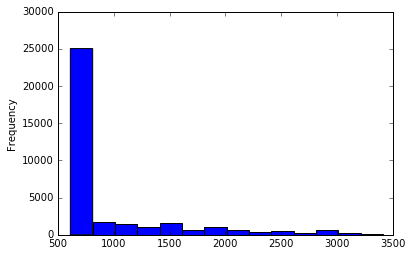

In [110]:
faixa = np.arange(610,3600,200)
plot = dd.beneficioAP.plot.hist(bins=faixa)

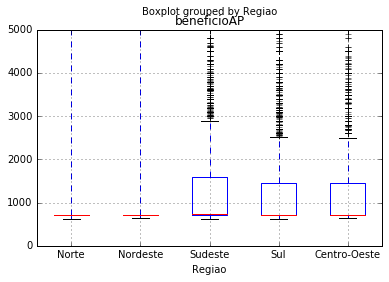

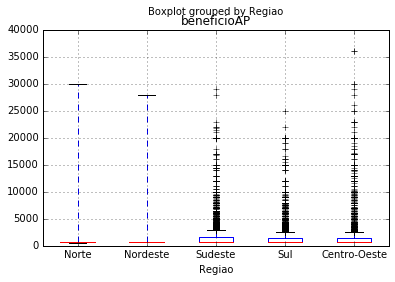

In [111]:
dd.boxplot(column = "beneficioAP", by = "Regiao")
plt.ylim(0, 5000)
dd.boxplot(column = "beneficioAP", by = "Regiao")

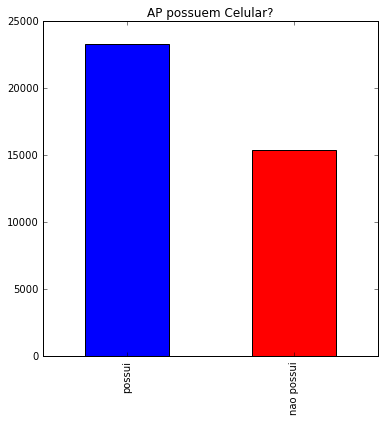

In [145]:
ut = (dd.celular.value_counts())
plot = ut.plot(kind='bar',title='AP possuem Celular?',figsize=(6, 6),color=('b','r','k','w','y'))

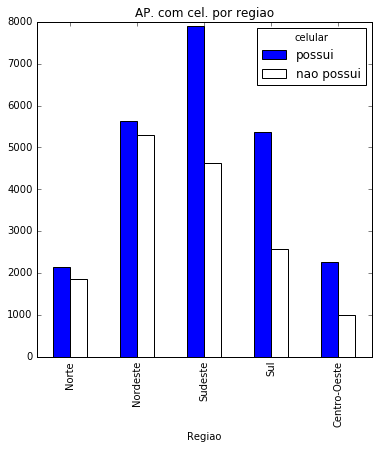

In [126]:
ct22 = pd.crosstab(dd.Regiao, dd.celular)
plot = ct22.plot(kind='bar',title='AP. com cel. por região',figsize=(6, 6),color=('b','w','k','r','y'))

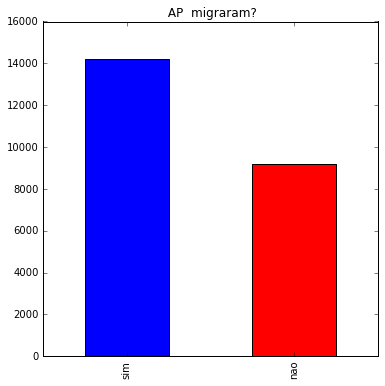

In [146]:
ut33 = (dd.migração.value_counts())
plot = ut33.plot(kind='bar',title=' AP  migraram?',figsize=(6, 6),color=('b','r','k','w','y'))

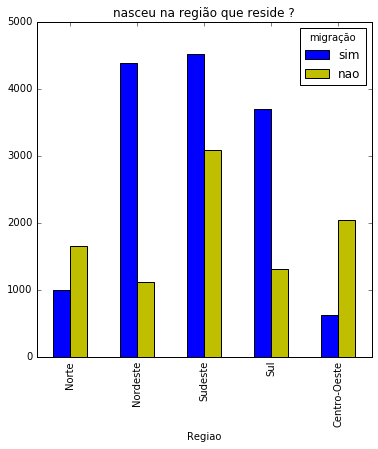

In [149]:
ct66 = pd.crosstab(dd.Regiao, dd.migração)
plot = ct66.plot(kind='bar',title='nasceu na região que reside ?',figsize=(6, 6),color=('b','y','k','r','w'))

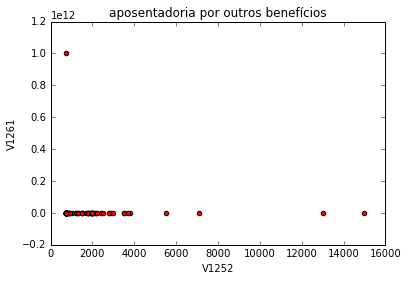

In [153]:
DADOS2014.plot.scatter(x='V1252', y='V1261', color='Red', title="aposentadoria por outros benefícios")

___

___
## Conclusão 

Podemos concluir atraves de todos os dados , graficos e tabelas que a população primeramente corresponde a cerca de 12% da população que soube responder e que praticamete 50 % das pessoas aposentados são mulheres.
Logo após, dividi a população de aposentados por região, apartir dai ja podemos perceber uma certa diferenciação entre estados.
Quando chegamos a faixa quantitava percebemos que o aposentado brasileiro ganha pouco dinheiro e não muito além  daquilo que ganha mensalmente, percebemos tambem ao plotar o grafico box plt por regioes a salario tem suas taixa mais elevadas, mesmo que pouco, nas regiões sudeste e centro-oeste. Após essa análise perguntei-me se influênciaria muito na compra de um telefone movel. Cheguei a conclusão que as regioes que ganham mais teem mais celulares nas mão dos idosos/aposentadodos. Percebi tambem que o destaque desses regiões ja vieram com o tempo, e após análises de migração interna cotatei que grande parte dos aposentados migraram de outra parte do pais em busca de oportunidades melhores. Por fim, um pequeno grafico de mostra um desvio no salario dos aposentados por terem alguns bonus de outros serviços da previdencia social.